In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


TRAIN_FILE = 'CC GENERAL.csv'
train_data = pd.read_csv(TRAIN_FILE)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
train_data.apply(lambda x: sum(x.isnull()/len(train_data)))

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [9]:
train_clean = train_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cols_to_drop = 'CUST_ID'
train_clean = train_clean.drop([cols_to_drop], axis=1)

train_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,299.351881,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
x = train_clean.values 
min_max_scaler = preprocessing.MinMaxScaler () 
x_scaled = min_max_scaler.fit_transform (x) 
x_scaled
train_clean = pd.DataFrame (x_scaled, columns = train_clean.columns)
train_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.003918,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


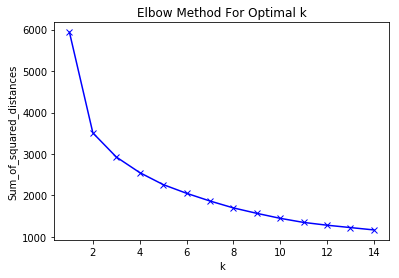

In [18]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(train_clean)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [25]:
np.random.seed(0)
msk = np.random.rand(len(train_clean)) < 0.8
train = train_clean[msk]
#train
test = train_clean[~msk]


In [26]:
X = np.array(train)
X_test = np.array(test)
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)
y_k = kmeans.predict(X_test)
test['PREDICTED_CLUSTER'] = y_k
test.head()

/home/marcin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PREDICTED_CLUSTER
7,0.095764,1.000000,0.008895,0.000000,0.019387,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.033520,0.075125,0.013388,0.006963,0.000000,1.0,2
8,0.053296,1.000000,0.017567,0.016228,0.008889,0.0,0.333333,0.083333,0.250000,0.0,0.0,0.013966,0.232053,0.013570,0.004083,0.000000,1.0,1
13,0.048400,1.000000,0.043596,0.010303,0.076354,0.0,0.750000,0.166667,0.750000,0.0,0.0,0.072626,0.248748,0.032647,0.003287,0.083333,1.0,2
17,0.002158,0.454545,0.010583,0.000000,0.023067,0.0,0.416667,0.000000,0.333333,0.0,0.0,0.022346,0.081803,0.005019,0.000958,0.250000,1.0,5
19,0.187888,1.000000,0.008129,0.000000,0.017717,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.033520,0.131886,0.020780,0.163148,0.000000,1.0,2


In [27]:
train_summary = test.groupby(by='PREDICTED_CLUSTER').mean()
train_summary = train_summary[['BALANCE', 'PURCHASES', 
                               'PURCHASES_FREQUENCY','CREDIT_LIMIT', 
                               'ONEOFF_PURCHASES_FREQUENCY', 
                              'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT', 
                               'PAYMENTS']]
train_summary

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,CREDIT_LIMIT,ONEOFF_PURCHASES_FREQUENCY,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,PAYMENTS
PREDICTED_CLUSTER,,,,,,,,
0,0.006553,0.023045,0.863710,0.135078,0.097511,0.002252,0.810473,0.023482
1,0.093222,0.019712,0.504581,0.156329,0.196415,0.011150,0.058100,0.029815
2,0.069795,0.022855,0.931911,0.121282,0.087391,0.016449,0.058727,0.027149
3,0.121086,0.089778,0.971862,0.243366,0.801660,0.010357,0.214596,0.078434
4,0.077917,0.046000,0.890875,0.199256,0.869456,0.008871,0.339266,0.049983
5,0.008421,0.007037,0.175371,0.133048,0.070990,0.002642,0.271720,0.032010
6,0.062364,0.006282,0.152993,0.097713,0.098011,0.004746,0.051367,0.015617
7,0.124688,0.002833,0.061651,0.141527,0.049718,0.014144,0.020695,0.029895


In [ ]:
"""
s a first iteration of the model, this appears to be identifying some useful segments. 
There are many ways in which we could tune the model including alternative data 
cleaning methods, feature engineering, dropping features with high correlation and 
hyperparameter optimisation. However, for the purpose of this post I wanted to give 
a high-level end to end view of how to start a machine learning model that performs 
unsupervised clustering.

"""